# Linear regression with gradient descent

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Defining model

In [9]:
def error_func(theta, x, y):
    m = x.shape[0]
    d = np.dot(x, theta) - y
    return np.dot(np.transpose(d), d) / m

def gradient_func(theta, x, y):
    # `gradient_func` = first derivative of `error_func`
    m = x.shape[0]
    d = np.dot(x, theta) - y
    return (2/m) * np.dot(np.transpose(x), d)

def my_linearRegression(X, Y, l_rate=0.001, accuracy=1e-5, start=None):
    
    #initializing coeff
    if start is None:
        theta = np.full((X.shape[1], 1), 0)
    else:
        theta = start
    
    grad = gradient_func(theta, X, Y)
    
    while not np.all(np.abs(grad) <= accuracy):
        theta = theta - l_rate * grad
        grad = gradient_func(theta, X, Y)
    
    return theta, error_func(theta, X, Y)

## Testing model

In [10]:
points = np.genfromtxt('data.csv', delimiter=',')
ones = np.full((points.shape[0], 1), 1.)
X = points[:, 0].reshape(100, 1)
X = np.hstack((ones, X))
Y = points[:, 1].reshape(100, 1)

theta, err = my_linearRegression(X, Y, l_rate=0.0004, accuracy=0.01)
theta, err

(array([[ 7.85853467],
        [ 1.325035  ]]), array([[ 110.25804614]]))

## Sklearn to compare

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Plotting

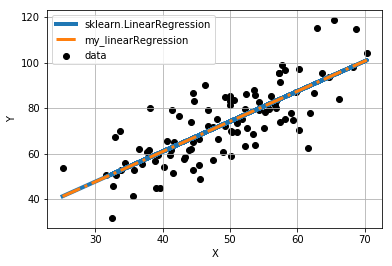

In [17]:
# plot input data
plt.scatter(X[:, 1], Y, label='data', c='k')

# plot prediction using sklearn
plt.plot(X[:, 1], regressor.predict(X), '-', label='sklearn.LinearRegression', linewidth=4)

# plot prediction using our model from scratch
X_plot = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
line = theta[0] + theta[1]*X_plot
plt.plot(X_plot, line, '-.', label='my_linearRegression', linewidth=3)

plt.legend()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')